 # <center><span style='color:Brown'>Parkinson's Disease Detection<center>
---
![](photo.jpeg)
___

## *Source*:
The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

## *Data Set Information*:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

## *Attribute Information*:

MDVP:F0 (Hz) --	Average vocal fundamental frequency

MDVP:Fhi (Hz) -- Maximum vocal fundamental frequency

MDVP:Flo (Hz) -- Minimum vocal fundamental frequency

MDVP:Jitter(%)	-- MDVP jitter in percentage

MDVP:Jitter(Abs) --	MDVP absolute jitter in ms

MDVP:RAP --	MDVP relative amplitude perturbation

MDVP:PPQ --	MDVP five-point period perturbation quotient

Jitter:DDP -- Average absolute difference of differences between jitter cycles

MDVP:Shimmer --	MDVP local shimmer

MDVP:Shimmer(dB) --	MDVP local shimmer in dB

Shimmer:APQ3 --	Three-point amplitude perturbation quotient

Shimmer:APQ5 --	Five-point amplitude perturbation quotient

MDVP:APQ11 -- MDVP 11-point amplitude perturbation quotient

Shimmer:DDA -- Average absolute differences between the amplitudes of consecutive periods

NHR	-- Noise-to-harmonics ratio

HNR -- Harmonics-to-noise ratio

RPDE --	Recurrence period density entropy measure

D2 -- Correlation dimension

DFA --	Signal fractal scaling exponent of detrended fluctuation analysis

Spread1 --	Two nonlinear measures of fundamental

Spread2 --	Frequency variation

PPE --	Pitch period entropy

** **MDVP**  - Multidimensional Voice Program

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [2]:
df = pd.read_excel('parkinsons.data.xlsx')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
df = df.drop(columns = ['name'])
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


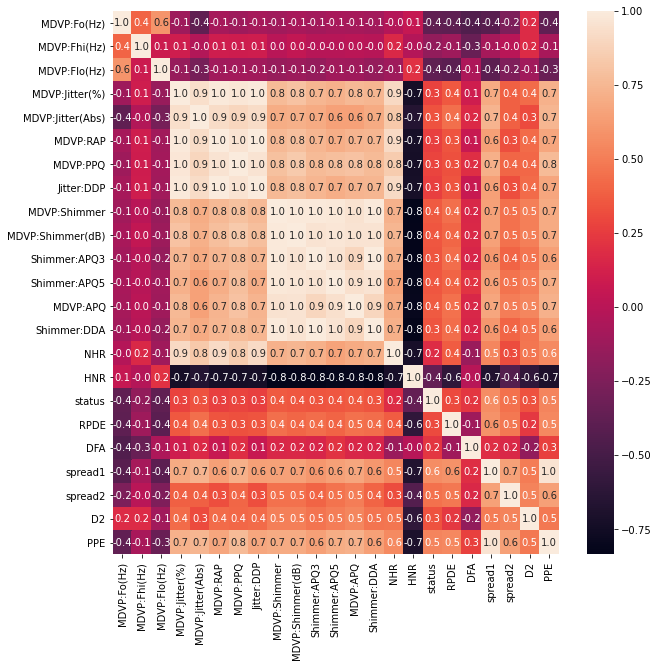

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [7]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

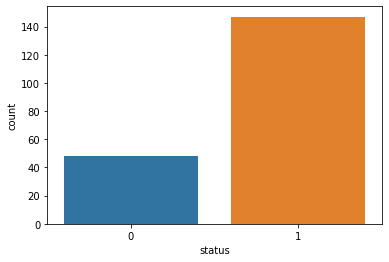

In [9]:
sns.countplot(x="status", data=df)
plt.show()

In [10]:
countNoDisease = len(df[df.status == 0])
countHaveDisease = len(df[df.status == 1])
print("Percentage of Patients Haven't Parkinson Disease: {:.2f}%".format((countNoDisease / (len(df.status))*100)))
print("Percentage of Patients Have Parkinson Disease: {:.2f}%".format((countHaveDisease / (len(df.status))*100)))

Percentage of Patients Haven't Parkinson Disease: 24.62%
Percentage of Patients Have Parkinson Disease: 75.38%


In [11]:
df_mean = df.groupby('status').mean()
df_mean.insert(0, 'status1', ['0','1'])
df_mean

,status1,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


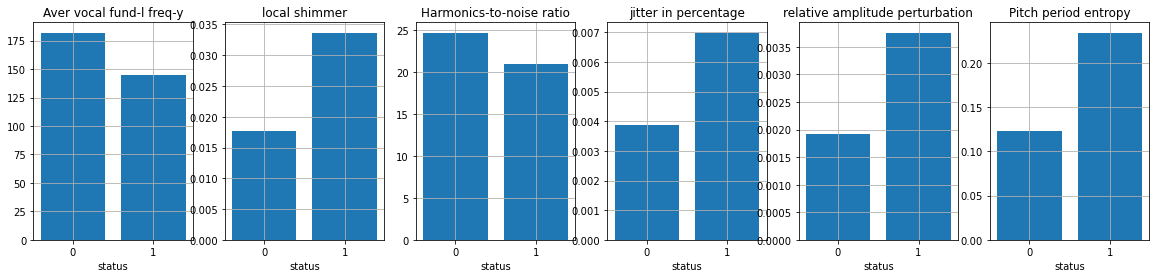

In [12]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 6, 1)
plt.title("Aver vocal fund-l freq-y")
plt.xlabel("status")
plt.grid()
plt.bar(df_mean['status1'], df_mean['MDVP:Fo(Hz)']);

plt.subplot(1, 6, 2)
plt.title("local shimmer")
plt.xlabel("status")
plt.grid()
plt.bar(df_mean['status1'], df_mean['MDVP:Shimmer']);

plt.subplot(1, 6, 3)
plt.title("Harmonics-to-noise ratio")
plt.xlabel("status")
plt.grid()
plt.bar(df_mean['status1'], df_mean['HNR']);

plt.subplot(1, 6, 4)
plt.title("jitter in percentage")
plt.xlabel("status")
plt.grid()
plt.bar(df_mean['status1'], df_mean['MDVP:Jitter(%)']);

plt.subplot(1, 6, 5)
plt.title("relative amplitude perturbation")
plt.xlabel("status")
plt.grid()
plt.bar(df_mean['status1'], df_mean['MDVP:RAP']);

plt.subplot(1, 6, 6)
plt.title("Pitch period entropy")
plt.xlabel("status")
plt.grid()
plt.bar(df_mean['status1'], df_mean['PPE']);

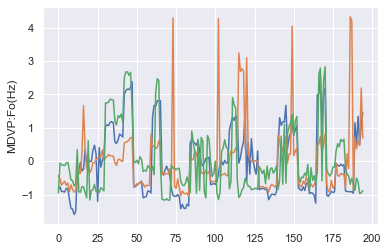

In [71]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df['MDVP:Fo(Hz)']); 
sns.lineplot(data=df['MDVP:Fhi(Hz)']);
sns.lineplot(data=df['MDVP:Flo(Hz)']);

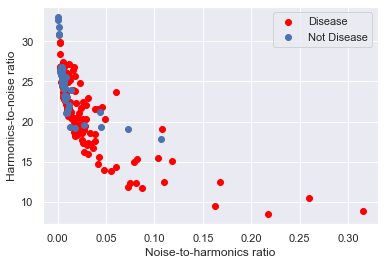

In [14]:
plt.scatter(x=df.NHR[df.status==1], y=df.HNR[(df.status==1)], c="red")
plt.scatter(x=df.NHR[df.status==0], y=df.HNR[(df.status==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Noise-to-harmonics ratio")
plt.ylabel("Harmonics-to-noise ratio")
plt.show()

# Data Processing

In [15]:
print(df.columns.values)

['MDVP:Fo(Hz)' 'MDVP:Fhi(Hz)' 'MDVP:Flo(Hz)' 'MDVP:Jitter(%)'
 'MDVP:Jitter(Abs)' 'MDVP:RAP' 'MDVP:PPQ' 'Jitter:DDP' 'MDVP:Shimmer'
 'MDVP:Shimmer(dB)' 'Shimmer:APQ3' 'Shimmer:APQ5' 'MDVP:APQ' 'Shimmer:DDA'
 'NHR' 'HNR' 'status' 'RPDE' 'DFA' 'spread1' 'spread2' 'D2' 'PPE']


In [16]:
s_sc = StandardScaler()
col_to_scale = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA','NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])

In [17]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,1,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,1,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,1,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,1,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,1,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [18]:
df.std().astype(int)

MDVP:Fo(Hz)         1
MDVP:Fhi(Hz)        1
MDVP:Flo(Hz)        1
MDVP:Jitter(%)      1
MDVP:Jitter(Abs)    1
MDVP:RAP            1
MDVP:PPQ            1
Jitter:DDP          1
MDVP:Shimmer        1
MDVP:Shimmer(dB)    1
Shimmer:APQ3        1
Shimmer:APQ5        1
MDVP:APQ            1
Shimmer:DDA         1
NHR                 1
HNR                 1
status              0
RPDE                1
DFA                 1
spread1             1
spread2             1
D2                  1
PPE                 1
dtype: int64

In [19]:
df.mean().astype(int)

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Models Building

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [21]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X.pop('status')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.311189,-0.227459,0.593395,0.631498,...,0.199282,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.191272,0.002258,-0.116922,-0.099041,...,-0.313046,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929
192,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.797139,0.992069,-0.352453,-0.135053,...,-0.438466,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.164847,0.131755,-0.358834,-0.212223,...,-0.485202,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105


## 1. Logistic regression

In [26]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.76%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.777778    0.889908  0.867647    0.833843      0.862700
recall      0.636364    0.941748  0.867647    0.789056      0.867647
f1-score    0.700000    0.915094  0.867647    0.807547      0.862902
support    33.000000  103.000000  0.867647  136.000000    136.000000
_______________________________________________
Confusion Matrix: 
 [[21 12]
 [ 6 97]]

Test Result:
Accuracy Score: 88.14%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.833333   0.893617  0.881356   0.863475      0.878291
recall      0.666667   0.954545  0.881356   0.810606      0.881356
f1-score    0.740741   0.923077  0.881356   0.831909      0.876720
support    15.000000  44.000000  0.881356  59.000000     59.000000
_________________

In [24]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score.round(2), test_score.round(2)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.76,88.14


## 2. K-nearest neighbors

In [27]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.59%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.885714    0.980198  0.955882    0.932956      0.957272
recall      0.939394    0.961165  0.955882    0.950279      0.955882
f1-score    0.911765    0.970588  0.955882    0.941176      0.956315
support    33.000000  103.000000  0.955882  136.000000    136.000000
_______________________________________________
Confusion Matrix: 
 [[31  2]
 [ 4 99]]

Test Result:
Accuracy Score: 89.83%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.909091   0.895833  0.898305   0.902462      0.899204
recall      0.666667   0.977273  0.898305   0.821970      0.898305
f1-score    0.769231   0.934783  0.898305   0.852007      0.892693
support    15.000000  44.000000  0.898305  59.000000     59.000000
_________________

In [28]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score.round(2), test_score.round(2)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.76,88.14
1,K-nearest neighbors,95.59,89.83


## 3. Decision Tree Classifier

In [29]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    33.0  103.0       1.0      136.0         136.0
_______________________________________________
Confusion Matrix: 
 [[ 33   0]
 [  0 103]]

Test Result:
Accuracy Score: 86.44%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.705882   0.928571  0.864407   0.817227      0.871956
recall      0.800000   0.886364  0.864407   0.843182      0.864407
f1-score    0.750000   0.906977  0.864407   0.828488      0.867067
support    15.000000  44.000000  0.864407  59.000000     59.000000
_______________________________________________
Confusion Matrix: 


In [30]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score.round(2), test_score.round(2)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.76,88.14
1,K-nearest neighbors,95.59,89.83
2,Decision Tree Classifier,100.00,86.44


## 4. Random Forest

In [31]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    33.0  103.0       1.0      136.0         136.0
_______________________________________________
Confusion Matrix: 
 [[ 33   0]
 [  0 103]]

Test Result:
Accuracy Score: 94.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.936170  0.949153   0.968085      0.952398
recall      0.800000   1.000000  0.949153   0.900000      0.949153
f1-score    0.888889   0.967033  0.949153   0.927961      0.947166
support    15.000000  44.000000  0.949153  59.000000     59.000000
_______________________________________________
Confusion Matrix: 


In [32]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score.round(2), test_score.round(2)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.76,88.14
1,K-nearest neighbors,95.59,89.83
2,Decision Tree Classifier,100.00,86.44
3,Random Forest Classifier,100.00,94.92


## 5. XGBoost Classifer

In [34]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

[11:31:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    33.0  103.0       1.0      136.0         136.0
_______________________________________________
Confusion Matrix: 
 [[ 33   0]
 [  0 103]]

Test Result:
Accuracy Score: 91.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy

In [35]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score.round(2), test_score.round(2)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.76,88.14
1,K-nearest neighbors,95.59,89.83
2,Decision Tree Classifier,100.00,86.44
3,Random Forest Classifier,100.00,94.92
4,XGBoost Classifier,100.00,91.53


## Models Hyperparameter Tuning

### 1. Logistic Regression Hyperparameter Tuning

In [36]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.8s finished
/Users/abaitynaev/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Best parameters: {'C': 0.615848211066026, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 86.03%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.750000    0.888889  0.860294    0.819444      0.855188
recall      0.636364    0.932039  0.860294    0.784201      0.860294
f1-score    0.688525    0.909953  0.860294    0.799239      0.856224
support    33.000000  103.000000  0.860294  136.000000    136.000000
_______________________________________________
Confusion Matrix: 
 [[21 12]
 [ 7 96]]

Test Result:
Accuracy Score: 86.44%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.818182   0.875000  0.864407   0.846591      0.860555
recall      0.600000   0.954545  0.864407   0.777273      0.864407
f1-score    0.692308   0.913043  0.864407   0.802676      0.856924
support    15.00000

In [78]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score.round(2), test_score.round(2)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.03,86.44


### 2. K-nearest neighbors Hyperparameter Tuning

In [42]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


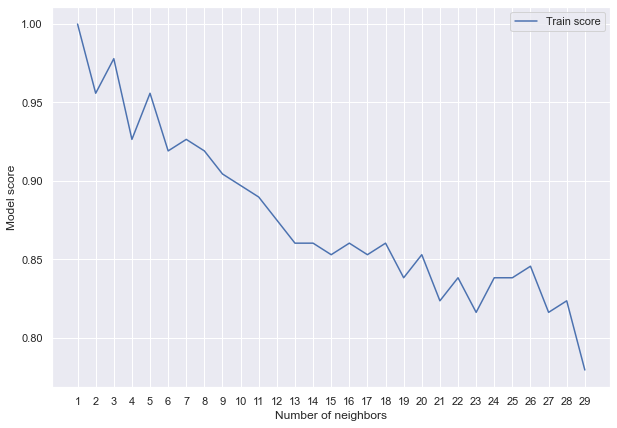

In [43]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 30, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [44]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    #train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 96.61%


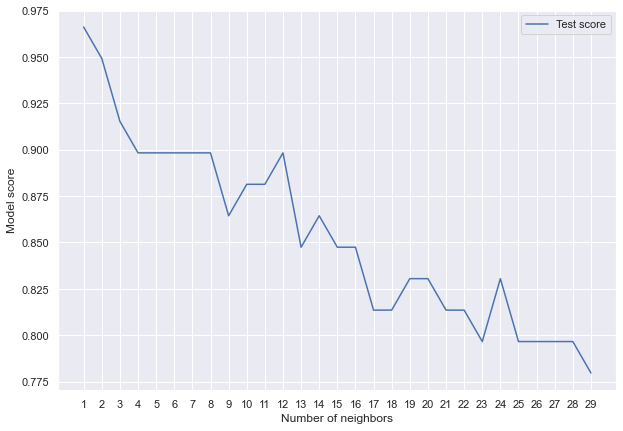

In [47]:
plt.figure(figsize=(10, 7))

#plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 30, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [48]:
knn_clf = KNeighborsClassifier(n_neighbors=26)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.56%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.928571    0.836066  0.845588    0.882319      0.858512
recall      0.393939    0.990291  0.845588    0.692115      0.845588
f1-score    0.553191    0.906667  0.845588    0.729929      0.820897
support    33.000000  103.000000  0.845588  136.000000    136.000000
_______________________________________________
Confusion Matrix: 
 [[ 13  20]
 [  1 102]]

Test Result:
Accuracy Score: 79.66%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.785714   0.79661   0.892857      0.840194
recall      0.200000   1.000000   0.79661   0.600000      0.796610
f1-score    0.333333   0.880000   0.79661   0.606667      0.741017
support    15.000000  44.000000   0.79661  59.000000     59.000000
_____________

In [80]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score.round(2), test_score.round(2)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.03,86.44
1,Tuned K-nearest neighbors,84.56,79.66


### 3. Decision Tree Classifier Hyperparameter Tuning

In [79]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 40))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 40))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 18252 candidates, totalling 54756 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 12280 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 19480 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 28280 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 38680 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 50680 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 54756 out of 54756 | elapsed:  2.9min finished


Best_params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
Train Result:
Accuracy Score: 95.59%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.846154    1.000000  0.955882    0.923077      0.962670
recall      1.000000    0.941748  0.955882    0.970874      0.955882
f1-score    0.916667    0.970000  0.955882    0.943333      0.957059
support    33.000000  103.000000  0.955882  136.000000    136.000000
_______________________________________________
Confusion Matrix: 
 [[33  0]
 [ 6 97]]

Test Result:
Accuracy Score: 79.66%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.615385   0.847826   0.79661   0.731605      0.788731
recall      0.533333   0.886364   0.79661   0.709848      0.796610
f1-score    0.571429   0.866

In [81]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score.round(2), test_score.round(2)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.03,86.44
1,Tuned K-nearest neighbors,84.56,79.66
2,Tuned Decision Tree Classifier,95.59,79.66


### 4. Random Forest Classifier Hyperparameter Tuning

In [87]:
n_estimators = [1100]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_samples_split = [1, 3, 6]
min_samples_leaf = [1, 5, 7]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.3min finished


Best parameters: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1100}
Train Result:
Accuracy Score: 98.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.980952  0.985294    0.990476      0.985574
recall      0.939394    1.000000  0.985294    0.969697      0.985294
f1-score    0.968750    0.990385  0.985294    0.979567      0.985135
support    33.000000  103.000000  0.985294  136.000000    136.000000
_______________________________________________
Confusion Matrix: 
 [[ 31   2]
 [  0 103]]

Test Result:
Accuracy Score: 93.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.916667  0.932203   0.958333      0.937853
recall      0.733333   1.000000  0.932203   0.866667      0.932203
f1-score    0.846154

In [88]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score.round(2), test_score.round(2)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.03,86.44
1,Tuned K-nearest neighbors,84.56,79.66
2,Tuned Decision Tree Classifier,95.59,79.66
3,Tuned Random Forest Classifier,98.53,93.22


### 5. XGBoost Classifier Hyperparameter Tuning

In [96]:
from scipy import stats
param_grid = dict(
    n_estimators=stats.randint(500, 1000),
    max_depth=stats.randint(1, 3, 9),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=50, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   33.0s finished
/Users/abaitynaev/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best paramters: {'learning_rate': 0.5766771226757568, 'max_depth': 11, 'n_estimators': 516}
[23:36:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    

In [97]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score.round(2), test_score.round(2)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.03,86.44
1,Tuned K-nearest neighbors,84.56,79.66
2,Tuned Decision Tree Classifier,95.59,79.66
3,Tuned Random Forest Classifier,98.53,93.22
4,Tuned XGBoost Classifier,100.00,89.83


In [98]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.76,88.14
1,K-nearest neighbors,95.59,89.83
2,Decision Tree Classifier,100.00,86.44
3,Random Forest Classifier,100.00,94.92
4,XGBoost Classifier,100.00,91.53


## Feature importance

In [61]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi

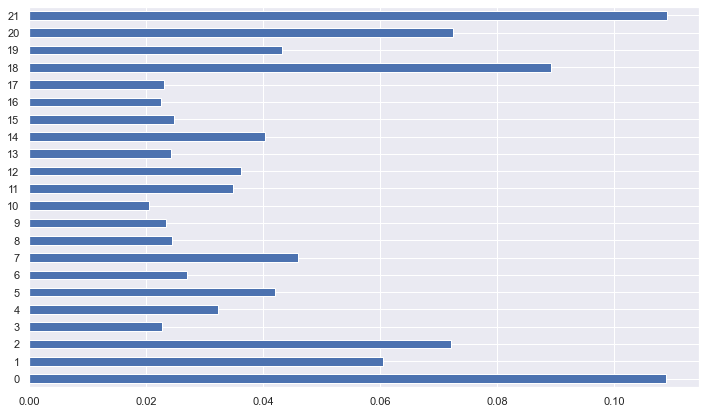

In [65]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False);

In [ ]:
#PPE ratio, Spread 1 & MDVP:Fo(Hz)

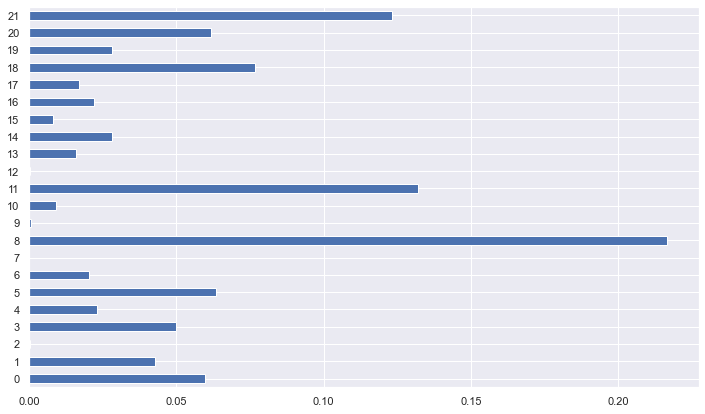

In [67]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False);

In [ ]:
#PPE ratio, MDVP:Shimmer, Shimmer:APQ5 